# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [2]:
df["Long_Titulo"] = df["title"].apply(len)
df["Long_Titulo"]

0      24
1      13
2      22
3      15
4      12
       ..
974     7
975    27
976    47
977    11
978    11
Name: Long_Titulo, Length: 979, dtype: int64

In [3]:

media = np.mean(df["Long_Titulo"])
mediana = np.median(df["Long_Titulo"])
moda = mode(df["Long_Titulo"], keepdims=True).mode[0]

# Mostrar resultados
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

Media: 15.481103166496425
Mediana: 14.0
Moda: 12


In [4]:
rango = df["Long_Titulo"].max() - df["Long_Titulo"].min()
varianza = np.var(df["Long_Titulo"], ddof=1)  # ddof=1 para varianza muestral
desviacion = np.std(df["Long_Titulo"], ddof=1)  # ddof=1 para std muestral

print(f"Rango: {rango}")
print(f"Varianza: {varianza}")
print(f"Desviación estándar: {desviacion}")

Rango: 67
Varianza: 72.1067488840288
Desviación estándar: 8.491569282766807


In [5]:
# Calcula asimetría y curtosis de la columna 'title_length'
df["Long_Titulo"] = df["title"].apply(len)

# Asimetría
asimetria = skew(df["Long_Titulo"])
curtosis_val = kurtosis(df["Long_Titulo"])


print(f"Asimetría (skew): {asimetria}")
print(f"Curtosis: {curtosis_val}")

Asimetría (skew): 1.5229143965677572
Curtosis: 3.7867237597626007


In [6]:
# Imprime el título más corto y el título más largo según su longitud
Min_Largo = df.loc[df["Long_Titulo"].idxmin(), "title"]
Max_Largo = df.loc[df["Long_Titulo"].idxmax(), "title"]

print(f"Título_Corto: {Min_Largo}")
print(f"Título_Largo: {Max_Largo}")

Título_Corto: M
Título_Largo: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


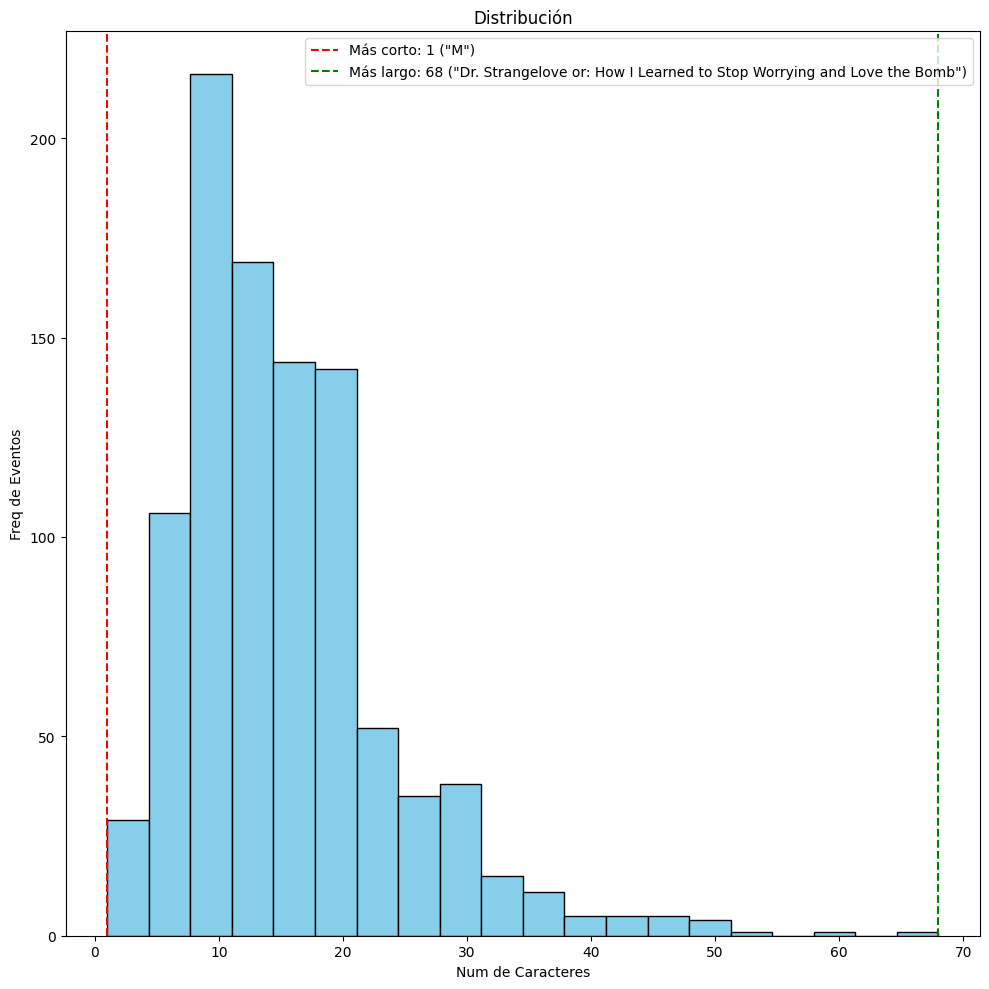

In [7]:
# grafica tus resultados
min_len = df["Long_Titulo"].min()
max_len = df["Long_Titulo"].max()
titulo_corto = df.loc[df["Long_Titulo"].idxmin(), "title"]
titulo_largo = df.loc[df["Long_Titulo"].idxmax(), "title"]

# Crear histograma
plt.figure(figsize=(10, 10))
plt.hist(df["Long_Titulo"], bins=20, color='skyblue', edgecolor='black')
plt.axvline(min_len, color='red', linestyle='--', label=f'Más corto: {min_len} ("{titulo_corto}")')
plt.axvline(max_len, color='green', linestyle='--', label=f'Más largo: {max_len} ("{titulo_largo}")')

# Etiquetas y título
plt.title("Distribución")
plt.xlabel("Num de Caracteres")
plt.ylabel("Freq de Eventos")
plt.legend(loc="upper right")
plt.tight_layout()

# Mostrar gráfico
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [8]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo:
Valores =  [10, 13, 14, 18, 22]

print(Valores)

[10, 13, 14, 18, 22]


In [9]:
# Calcula la media de los 5 valores
Promedio = sum(Valores) / len(Valores)
print(f"Media: {Promedio}")

Media: 15.4


In [11]:
# Calcula las diferencias al cuadrado con respecto a la media
# Buscque la resuesta, yo lo hice mas complicado
suma_diferencias = sum((x - Promedio)**2 for x in Valores)
print(f"Suma de diferencias al cuadrado: {suma_diferencias}")

Suma de diferencias al cuadrado: 87.19999999999999


In [13]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
import math

Varianza = suma_diferencias / len(Valores)
Desviasion = math.sqrt(Varianza)


print(f"Varianza: {Varianza}")
print(f"Desviación estándar: {Desviasion}")

Varianza: 17.439999999999998
Desviación estándar: 4.176122603564219
